In [34]:
from astropy.io import fits, ascii
from photutils import CircularAperture, CircularAnnulus
import numpy as np
import functions as func
import matplotlib.pyplot as plt
import pdb, glob, mpld3
from mpld3 import plugins
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
mpld3.enable_notebook()

In [18]:
bcd_2506 = np.sort(glob.glob("ngc2506/unzipped_AORs/ch1/bcd/*_bcd.fits"))
bimsk_2506 = np.sort(glob.glob("ngc2506/unzipped_AORs/ch1/bcd/*_bimsk.fits"))
bunc_2506 = np.sort(glob.glob("ngc2506/unzipped_AORs/ch1/bcd/*_bunc.fits"))
cbcd_2506 = np.sort(glob.glob("ngc2506/unzipped_AORs/ch1/bcd/*_cbcd.fits"))
cbunc_2506 = np.sort(glob.glob("ngc2506/unzipped_AORs/ch1/bcd/*_cbunc.fits"))

In [19]:
hdu = fits.open(bcd_2506[10])
hdu.info()

Filename: ngc2506/unzipped_AORs/ch1/bcd/SPITZER_I1_17133824_0010_0000_3_bcd.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     321   (256, 256)   float32   


In [20]:
hdu[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                  256 / STANDARD FITS FORMAT                           
NAXIS2  =                  256 / STANDARD FITS FORMAT                           
ORIGIN  = 'Spitzer Science Center' / Organization generating this FITS file     
CREATOR = 'S18.25.0'           / SW version used to create this FITS file       
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    1 / 1 digit instrument channel number              
EXPTYPE = 'sci     '           / Exposure Type                                  
REQTYPE = 'AOR     '           / Request type (AOR, IER, or  SER)               
AOT_TYPE= 'IracMap '        

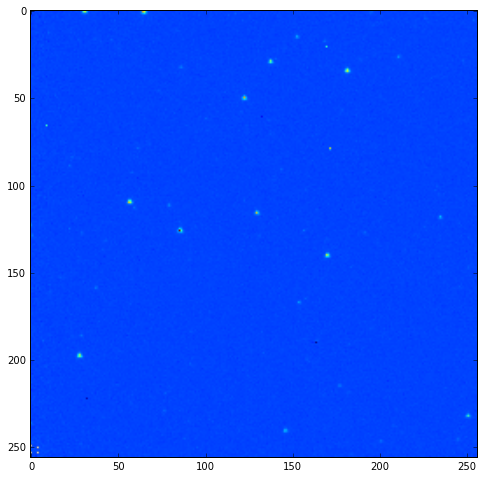

In [29]:
fig1, ax1 = plt.subplots()
ax1.imshow(hdu[0].data)
plugins.connect(fig1, plugins.MousePosition(fontsize=14))

In [24]:
bimsk_hdu = fits.open(bimsk_2506[10])
bimsk_hdu.info()

Filename: ngc2506/unzipped_AORs/ch1/bcd/SPITZER_I1_17133824_0010_0000_3_bimsk.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      87   (256, 256)   int16   


In [7]:
bimsk_hdu[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                  256 / STANDARD FITS FORMAT                           
NAXIS2  =                  256 / STANDARD FITS FORMAT                           
ORIGIN  = 'Spitzer Science Center' / Organization generating this FITS file     
CREATOR = 'S18.25.0'           / SW version used to create this FITS file       
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    1 / 1 digit instrument channel number              
                                                                                
                                                                                
          / PROPOSAL INFORMA

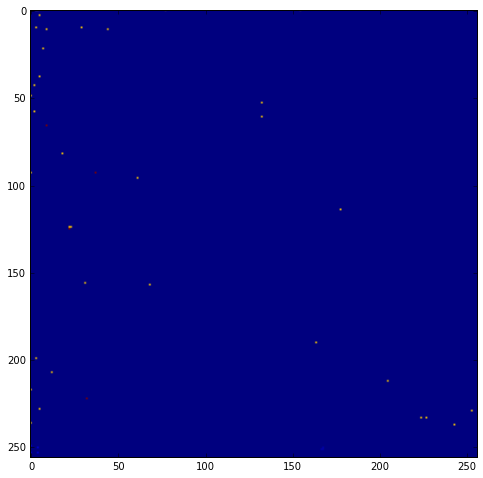

In [30]:
fig2, ax2 = plt.subplots()
ax2.imshow(bimsk_hdu[0].data)
plugins.connect(fig2, plugins.MousePosition(fontsize=14))

In [9]:
bunc_hdu = fits.open(bunc_2506[10])
bunc_hdu.info()

Filename: ngc2506/unzipped_AORs/ch1/bcd/SPITZER_I1_17133824_0010_0000_3_bunc.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     333   (256, 256)   float32   


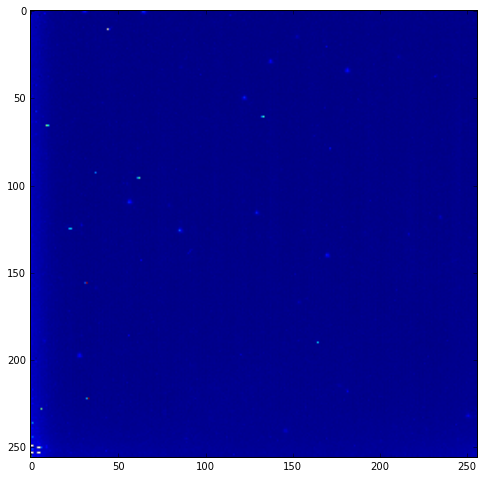

In [31]:
fig3, ax3 = plt.subplots()
ax3.imshow(bunc_hdu[0].data)
plugins.connect(fig3, plugins.MousePosition(fontsize=14))

In [11]:
cbcd_hdu = fits.open(cbcd_2506[10])
cbcd_hdu.info()

Filename: ngc2506/unzipped_AORs/ch1/bcd/SPITZER_I1_17133824_0010_0000_3_cbcd.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     330   (256, 256)   float32   


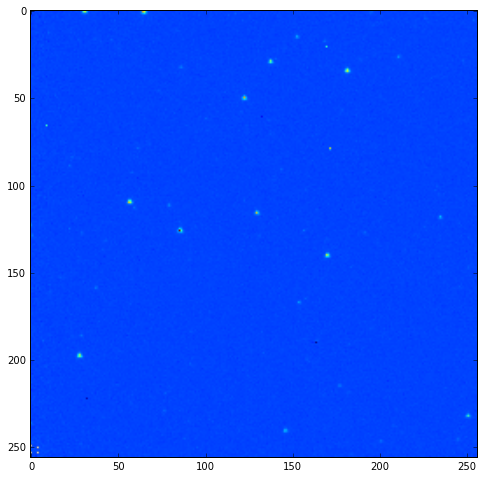

In [32]:
fig4, ax4 = plt.subplots()
ax4.imshow(cbcd_hdu[0].data)
plugins.connect(fig4, plugins.MousePosition(fontsize=14))

In [13]:
cbunc_hdu = fits.open(cbunc_2506[10])
cbunc_hdu.info()

Filename: ngc2506/unzipped_AORs/ch1/bcd/SPITZER_I1_17133824_0010_0000_3_cbunc.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     327   (256, 256)   float32   


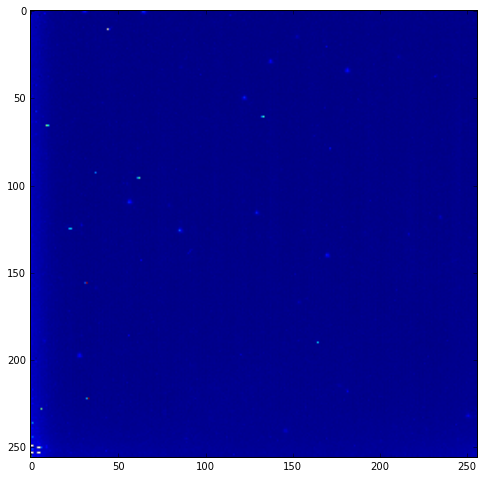

In [33]:
fig2, ax2 = plt.subplots()
ax2.imshow(bimsk_hdu[0].data)
plugins.connect(fig2, plugins.MousePosition(fontsize=14))

# bcd (Basic Calibrated Data) Files

In [52]:
hdu = fits.open(bcd_2506[5]) #5th bcd file
image = hdu[0].data

In [54]:
reload(func)

<module 'functions' from 'functions.py'>

217.480492915


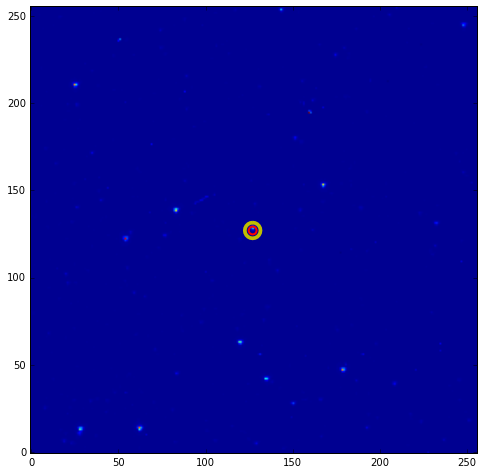

In [64]:
# 10th bcd file
flux, ap = func.photometry(image, [127], [127], rad = 2.25)
bkg_ap = func.photometry(image, [127], [127], shape = 'CircAnn', r_in = 4, r_out = 5)[1]
print flux

fig, ax = plt.subplots()
ax.imshow(image, origin = 'lower')
ap.plot(color='r',linewidth=2)
bkg_ap.plot(color='y', linewidth=2)
plugins.connect(fig, plugins.MousePosition(fontsize=14))